In [24]:
import soundfile as sf

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from signalTeste import *
import time
import pickle
import wave
import peakutils
import scipy.signal as signal
%matplotlib inline

In [26]:
sig = signalMeu()
fs = 48000
sd.default.samplerate = fs
sd.default.channels = 1

In [34]:
def plotaTF(data):
    freq, amplt = sig.calcFFT(data[20000:25000],fs)

    fig = plt.figure()
    fig.subplots_adjust(hspace=1,wspace=1)

    ax = fig.add_subplot(2,1,1)
    plt.title("Sinal no tempo")
    plt.plot(data[20000:25000])

    plt.subplot(2,1,2)
    plt.title("Sinal na frequência")
    plt.plot(freq,amplt)

### Abrindo o arquivo

In [28]:
data, fs = sf.read('smnsh.wav')

##### Domínio do tempo X Domínio da frequência

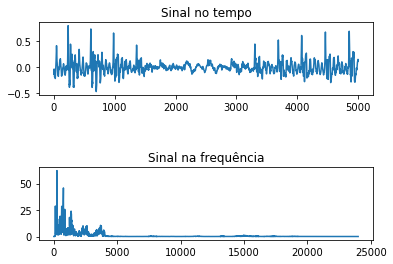

In [29]:
plotaTF(data)
sd.play(data)
sd.wait()

##### Normalizado

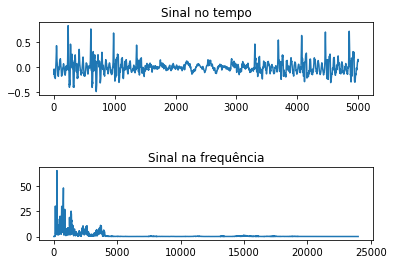

In [30]:
normdata = data/max(data)
plotaTF(normdata)

#### Filtrando o signal

In [31]:
nyq_rate = fs/2
width = 5.0/nyq_rate
ripple_db = 60.0 #dB
N , beta = signal.kaiserord(ripple_db, width)
cutoff_hz = 4000.0
taps = signal.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
yFiltrado = signal.lfilter(taps, 1.0, normdata)

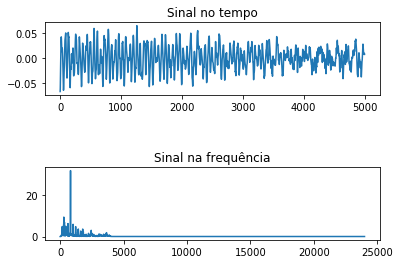

In [33]:
plotaTF(yFiltrado)

In [11]:
yFiltradoT = yFiltrado[17805:]
print(yFiltradoT[0])

0.02803845644861198


In [12]:
#plt.plot(yFiltradoT)
#plt.plot(normdata)
#plt.show()

In [13]:
len(yFiltradoT)/fs

3.6290625

In [14]:
time, carrier = sig.generateSin(14000, 1, len(yFiltradoT)/fs, fs)

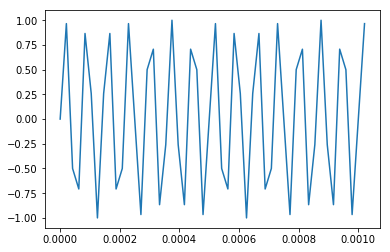

In [15]:
plt.plot(time[0:50],carrier[0:50])
plt.show()

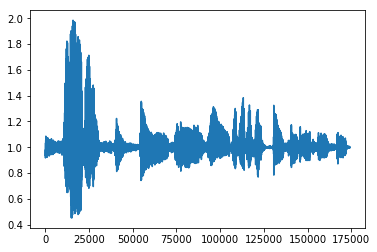

In [16]:
plt.plot(yFiltradoT+1)
plt.show()

In [17]:
modulada = np.multiply(carrier,(yFiltradoT))

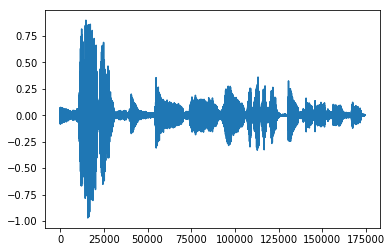

In [18]:
plt.plot(modulada)
plt.show()

In [22]:
sd.play(modulada)